<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/03_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다중 회귀(multiple regression)
하나의 특성(feature)을 사용 -> 선형 회귀 모델  
여러 개의 특성을 사용 -> 다중 회귀 모델  

단항, 다항 = degree  
단순, 다중 = feature 의 개수


하나의 feature = axis(축)  
서로 다른 변수 길이, 높이, 두께를 가지고 무게를 예측

- 특성 공학(feature engineering)  
길이, 높이, 두께, 길이X높이 <<--새로운 특성을 만들어내는 작업  
ex. 길이**2

#데이터 준비

In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#사이킷런의 변환기(Transformer)
1. fit()  
2. transform()

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [9]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input) # 기존 feature 3개
train_poly = poly.transform(train_input) # 알아서 교차항을 만들게 할 수 있음
print(train_poly.shape)

(42, 9)


In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [12]:
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


#다중 회귀 모델 훈련하기 (중회귀)

1 -> 2 -> 9개

In [13]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [14]:
# print(lr.score(test_poly, test_target))
r2_score(test_target, lr.predict(test_poly))

# 둘 다 적절하게 성능이 우수해졌다!

0.9714559911594134

In [15]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree=5 로 설정!

# poly.fit(train_input)
# train_poly = poly.transform(train_input)
train_poly = poly.fit_transform(train_input) #위 과정을 한꺼번에

test_poly = poly.transform(test_input)
print(train_poly.shape) # 항이 55개(feature : 1->2->9->55 로 늘어남)

(42, 55)


In [16]:
#이 경우는 overfit 된 형태 -> 데이터에 비해 feature가 너무 많다

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [17]:
print(lr.score(test_poly, test_target))

-144.40579242684848


###Q. degree가 1~5 중 overfit 혹은 underfit 문제가 해소되는 다중회귀 모델을 만드십시오. (다중+다항 회귀 모델)

A. 두 개 다 점수가 높고, 훈련 점수가 테스트 점수보다 높은 모델을 찾아야 함  

In [ ]:
for d in range(1,6):
  poly = PolynomialFeatures(degree=d, include_bias=False)
  train_poly = poly.fit_transform(train_input)
  test_poly = poly.transform(test_input)

  lr.fit(train_poly, train_target)
  train_score = r2_score(train_target, lr.predict(train_poly))
  test_score = r2_score(test_target, lr.predict(test_poly))

  print(f"degree = {d} & feature = {train_poly.shape[1]}")
  print(f"  -> train {train_score} ")
  print(f"     test  {test_score}\n")

degree = 1 & feature = 3  
  -> train 0.9559326821885706   
     test  0.8796419177546367  

degree = 2 & feature = 9  
  -> train 0.9903183436982124   
     test  0.9714559911594134  

degree = 3 & feature = 19  
  -> train 0.99638723409801 -> 학습 성능은 계속 올라가는 중   
     test  0.9410534492233222  

degree = 4 & feature = 34  
  -> train 0.9995286898074609   
     test  -6.7866969165723585 -> 점수 꺾임  

degree = 5 & feature = 55  
  -> train 0.9999999999991097   
     test  -144.40579242684848  

feature가 커 질수록 model complexity 증가 -> train 학습 점수 증가  
하지만, 어느 지점부터 test 시험 점수는 꺾이는 지점 생성

-> fit, transform 등등의 머신러닝 알고리즘은 이미 개발되어 있는 것  
이것을 활용하여 어떤 솔루션을 해결하고, 서비스를 개발할 것인지를 생각해야 함

#규제(regularization)
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것  
즉, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것  


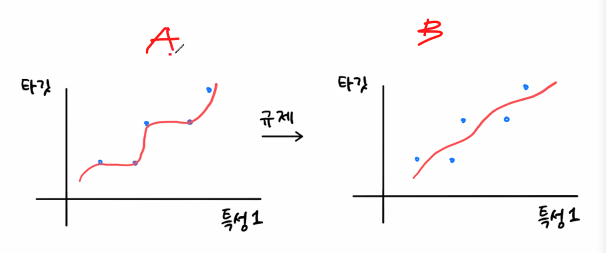

B가 더 좋은 모델 ->  일반화 성능이 높다  
A는 overfitted model(과적합된 학습 모델)  
새로운 값을 넣었을 때, 오차가 매우 심할 것

###규제 전에 표준화하기

In [20]:
train_poly.shape, train_poly.shape #오버피트 상태 -> 이걸 없애기 위해 규제 가해서 best fit 찾기

((42, 55), (42, 55))

In [19]:
from sklearn.preprocessing import StandardScaler #최소값과 최대값을 이용해서 규제

ss = StandardScaler() # N(mu, sigma^2) -> z-score 제공
ss.fit(train_poly) # 평균, 표준편차 생성 과정을 대신 수행해 주는 것임
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

1. PolynomialFeatures   
2. StandardScaler      
어떤 것을 먼저 적용해야 하는가?  

StandardScaler는 feature가 다 만들어지고 나서  
train_poly의 평균, 표준편차를 생성하는 것이 맞음

#릿지 회귀(L2)
https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

In [44]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [45]:
print(r2_score(train_target, lr.predict(train_scaled)))

-77891.02959204825


In [46]:
print(r2_score(test_target, lr.predict(test_scaled)))

-108118.14508327622


In [59]:
from sklearn.linear_model import Ridge

ridge = Ridge()
#ridge = Ridge(alpha=1000)
#ridge = Ridge(alpha=100)
#ridge = Ridge(alpha=0) -> alpha값으로 규제의 정도를 정할 수 있음 0으로 적용하면 완전 점수 내려감
ridge.fit(train_scaled, train_target)
print(r2_score(train_target, ridge.predict(train_scaled))) #죅금 내려감

0.9896101671037343


In [60]:
print(r2_score(test_target, ridge.predict(test_scaled)))  #overfit 였던 점수가 조정되었다
# degree = 5 & feature = 55
# -> train 0.9999999999991097
# test -144.40579242684848

# train 0.9896101671037343
# test 0.9790693977615397  --> 상당히 best fit에 가깝다!!

0.9790693977615397


In [53]:
lr.coef_ #기존 가중치

array([-2.09046286e+04, -1.28182177e+03, -5.60568587e+03,  2.08210606e+03,
        1.22297051e+03, -1.43811540e+03, -4.56962070e+03, -5.32891417e+02,
        6.00788380e+03, -2.10700052e+01, -6.86630547e+01, -1.38720413e+03,
       -1.07566030e+03,  3.95364102e+03,  5.36644563e+03,  3.82395517e+03,
       -5.41578595e+03, -7.44650725e+03, -3.57626691e+03, -8.28151603e+00,
        3.60946181e+02, -4.02975688e+02, -3.16263595e+03,  3.78221470e+03,
        1.35360877e+03,  9.49694720e+03, -9.03127652e+03, -7.05277641e+03,
       -5.77034173e+03, -9.30116997e+03,  5.09465750e+03,  9.77745663e+03,
        9.37625135e+03,  7.91894742e+03, -2.17004839e+00,  3.18815197e+01,
        1.05750599e+01,  1.25145412e+02, -1.16343733e+03,  8.34274225e+02,
       -1.83477034e+03,  7.09702960e+03, -1.74946596e+03, -3.82035083e+03,
        5.50888378e+03, -1.57853612e+04, -1.46750807e+03,  8.08789552e+03,
        8.01725139e+03, -5.22510168e+03,  1.18582793e+04,  6.17623466e+03,
       -7.04139963e+03, -

In [61]:
ridge.coef_ # 페널티(규제)를 적용하여 가중치를 조절함

array([18.75202605,  9.99048537,  9.64586193, 17.278557  , 14.42089598,
       12.69251285, 12.34283964, 10.88252862, 12.55963482, 12.93825844,
       12.67925897,  9.12136175, 12.49327194,  9.02641662,  8.39716922,
       12.21409663,  8.99564455,  8.85968975, 11.68602892,  7.48294042,
        8.98610839,  3.37199818, 10.27381252,  4.61786228,  1.60700275,
       11.21975321,  5.66171476,  2.9808368 ,  3.17359806, 11.72544455,
        6.40554378,  4.19129005,  5.06384222,  8.89201309,  1.89344091,
        4.81186299, -2.91832747,  7.38733861, -0.51038117, -5.91335297,
        9.5029666 ,  1.56464851, -3.66645267, -6.13031213, 11.06068777,
        3.21356622, -1.71089861, -3.65107495, -2.63704498, 11.98418393,
        4.3636902 , -0.11776857, -1.40420516,  0.45174316,  5.29453248])

In [63]:
# alpha는 어느 정도가 적당할지 확인해보자
# 즉, 하이퍼 파라미터는 적당한 값이 나올 때까지 모두 돌려봐야 함

for a in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, train_target)

  print(f"alpha = {a}")
  print(f"  -> train {r2_score(train_target, ridge.predict(train_scaled))} ")
  print(f"     test  {r2_score(test_target, ridge.predict(test_scaled))}\n")

alpha = 0.001
  -> train 0.9930455252088191 
     test  0.9569388961556926

alpha = 0.01
  -> train 0.9917809981250538 
     test  0.9800187936873143

alpha = 0.1
  -> train 0.9903815817570366 
     test  0.9827976465386926

alpha = 1
  -> train 0.9896101671037343 
     test  0.9790693977615397

alpha = 10
  -> train 0.988728468997471 
     test  0.9725329582461569

alpha = 100
  -> train 0.9841843235774494 
     test  0.9627042641050291

alpha = 1000
  -> train 0.8918186303757933 
     test  0.8980712146634267

alpha = 10000
  -> train 0.32897625235974215 
     test  0.31047864216228993



alpha = 0.001  
  -> train 0.9930455252088191   
     test  0.9569388961556926  


alpha = 0.01  
  -> train 0.9917809981250538   
     test  0.9800187936873143  


alpha = 0.1 --------> BEST!  
  -> train 0.9903815817570366 - 가장 정점인 부분    
     test  0.9827976465386926  


alpha = 1  
  -> train 0.9896101671037343   
     test  0.9790693977615397  

In [74]:
# 그래프로 그려보자

train_score, test_score = [], []
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
for a in alphas:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, train_target)

  train_score.append(r2_score(train_target, ridge.predict(train_scaled)))
  test_score.append(r2_score(test_target, ridge.predict(test_scaled)))

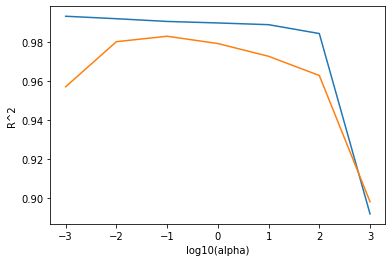

In [76]:
plt.plot(np.log10(alphas), train_score) #alpha 상용로그화 하여 상수로 변경해주자
plt.plot(np.log10(alphas), test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

# 규제가 점점 강해질수록 점수가 떨어지고 있음
# alpha = 0.1일때 제일 값이 좋았음을 알 수 있음

In [77]:
# alpha = 0.1 일때의 최종 모델 훈련시키기

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(r2_score(train_target, ridge.predict(train_scaled)))
print(r2_score(test_target, ridge.predict(test_scaled)))

0.9903815817570366
0.9827976465386926


#라쏘회귀(L1)

In [78]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(r2_score(train_target, lasso.predict(train_scaled)))
print(r2_score(test_target, lasso.predict(test_scaled))) # 굳점수..!

0.989789897208096
0.9800593698421883


In [82]:
import warnings
warnings.filterwarnings(action='ignore')

In [86]:
for a in [0.001, 0.01, 0.1, 1, 10, 100]:
  lasso = Lasso(alpha = a)
  lasso.fit(train_scaled, train_target)

  print(f"alpha = {a}")
  print(f"  -> train {r2_score(train_target, lasso.predict(train_scaled))} ")
  print(f"     test  {r2_score(test_target, lasso.predict(test_scaled))}\n")

  # alpha = 0.001일때 가장 점수가 좋다

alpha = 0.001
  -> train 0.990856843502147 
     test  0.9836870822242811

alpha = 0.01
  -> train 0.9907921500205304 
     test  0.9836730006301534

alpha = 0.1
  -> train 0.990137631128448 
     test  0.9819405116249363

alpha = 1
  -> train 0.989789897208096 
     test  0.9800593698421883

alpha = 10
  -> train 0.9888067471131867 
     test  0.9824470598706695

alpha = 100
  -> train 0.9078632190121442 
     test  0.9089071866576974



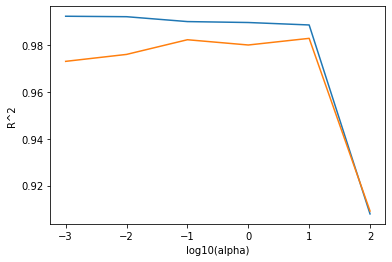

In [85]:
train_score, test_score = [], []
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alphas:
  lasso = Lasso(alpha = a, max_iter=10000)
  lasso.fit(train_scaled, train_target)

  train_score.append(r2_score(train_target, lasso.predict(train_scaled)))
  test_score.append(r2_score(test_target, lasso.predict(test_scaled)))

plt.plot(np.log10(alphas), train_score)
plt.plot(np.log10(alphas), test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

In [87]:
lasso.coef_
# 실제로 0인것 빼고 살아있는 계수는 3개 뿐임 -> feature가 3개로 조정됨 

# 변수를 줄이는 기법(아얘 0을 만들어버림) - 라쏘
# 전체적으로 계수의 영향을 줄이는 기법(변수의 수를 줄이진 못함, 0 안됨) - 릿지

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.50261219,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        81.7197224 , 167.24554985,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [88]:
np.sum(lasso.coef_ == 0)

52

###Q. 해당 모형에서 의미있는 변수의 이름을 찾아보시오

In [89]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [91]:
lasso.coef_ != 0

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [92]:
#위의 두 array를 결합
poly.get_feature_names_out()[lasso.coef_ != 0]

array(['x0 x1', 'x0 x1^2', 'x0 x1 x2'], dtype=object)